In [3]:
#pip install citipy


# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

units="Imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | chemin grenier
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | mersin
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | zeya
Processing Record 5 of Set 1 | belyy yar
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | simplicio mendes
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | biryusinsk
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | talakan
Processing Record 19 of Set 1 | brisas de zicatela
Processing Record 20 of Set 1 | yerofey pavlovich
Processing Record 21 of Set 1 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chemin grenier,-20.4872,57.4656,74.79,87,36,7.87,MU,1732491771
1,blackmans bay,-43.0167,147.3167,57.33,94,94,6.02,AU,1732491771
2,mersin,36.8620,34.6509,43.52,45,2,8.08,TR,1732491488
3,albany,42.6001,-73.9662,38.53,66,71,3.00,US,1732491562
4,zeya,53.7500,127.2667,12.00,93,100,2.91,RU,1732491567


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chemin grenier,-20.4872,57.4656,74.79,87,36,7.87,MU,1732491771
1,blackmans bay,-43.0167,147.3167,57.33,94,94,6.02,AU,1732491771
2,mersin,36.8620,34.6509,43.52,45,2,8.08,TR,1732491488
3,albany,42.6001,-73.9662,38.53,66,71,3.00,US,1732491562
4,zeya,53.7500,127.2667,12.00,93,100,2.91,RU,1732491567


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

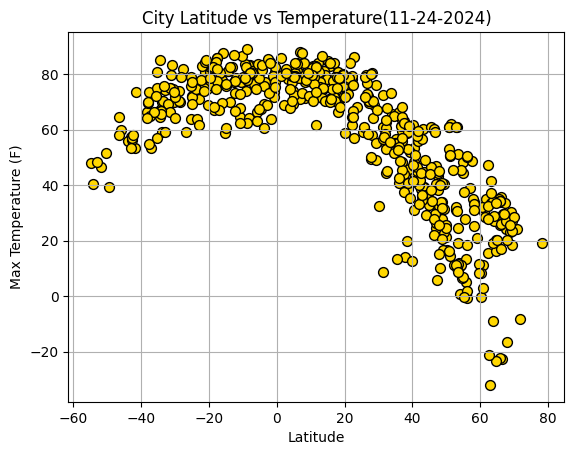

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

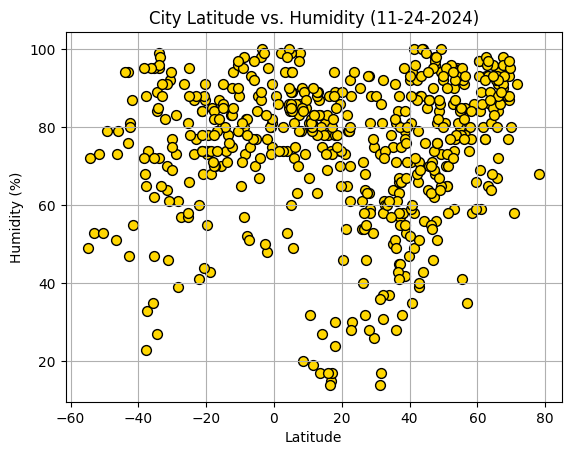

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

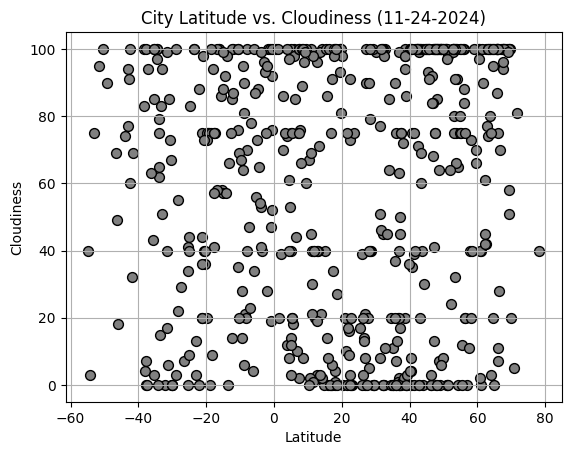

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True) 
 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

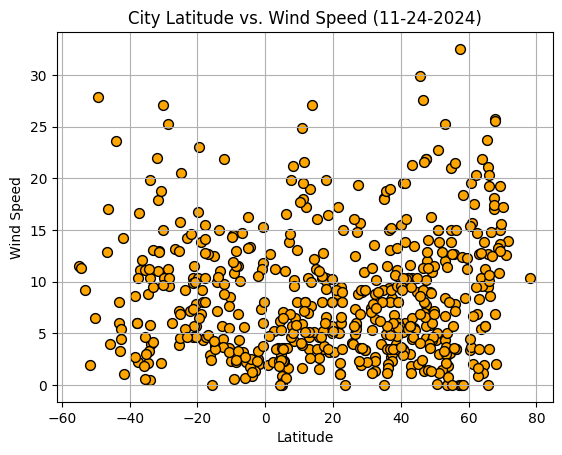

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="orange",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True) 
 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    #compute linear regresion
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plot
    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mersin,36.8620,34.6509,43.52,45,2,8.08,TR,1732491488
3,albany,42.6001,-73.9662,38.53,66,71,3.00,US,1732491562
4,zeya,53.7500,127.2667,12.00,93,100,2.91,RU,1732491567
5,belyy yar,53.6039,91.3903,19.29,93,75,0.00,RU,1732491772
6,bilibino,68.0546,166.4372,-16.40,96,100,2.01,RU,1732491772


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chemin grenier,-20.4872,57.4656,74.79,87,36,7.87,MU,1732491771
1,blackmans bay,-43.0167,147.3167,57.33,94,94,6.02,AU,1732491771
8,simplicio mendes,-7.8539,-41.9103,83.26,52,70,4.38,BR,1732491772
9,ushuaia,-54.8000,-68.3000,47.86,49,40,11.50,AR,1732491717
10,souillac,-20.5167,57.5167,75.58,88,40,5.75,MU,1732491772


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7132212164388357


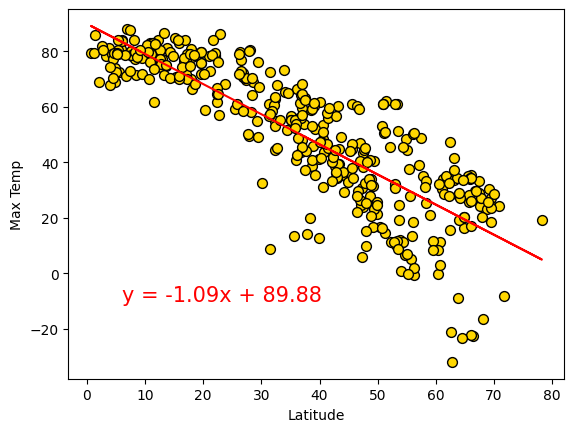

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10),"gold")

The r-value is: 0.35260773342400464


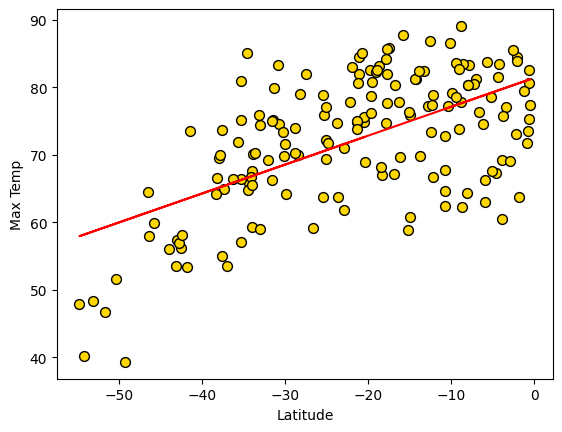

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,35),"gold")

**Discussion about the linear relationship:** r-value .7 respresents a strong positive correlation in northern hemisphere. r-value .3 represents a weak positive correlation in the southern hemispere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.032733693129559094


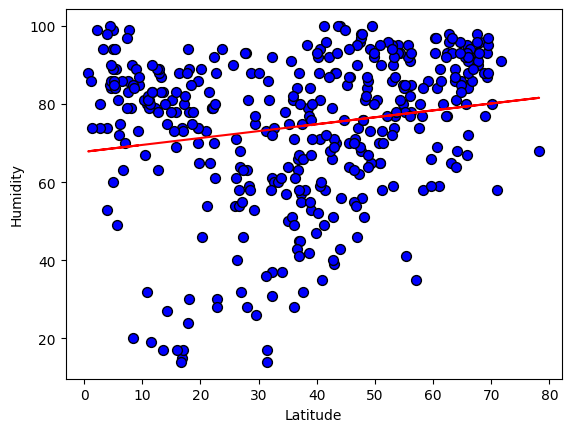

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10),"blue")

The r-value is: 0.35260773342400464


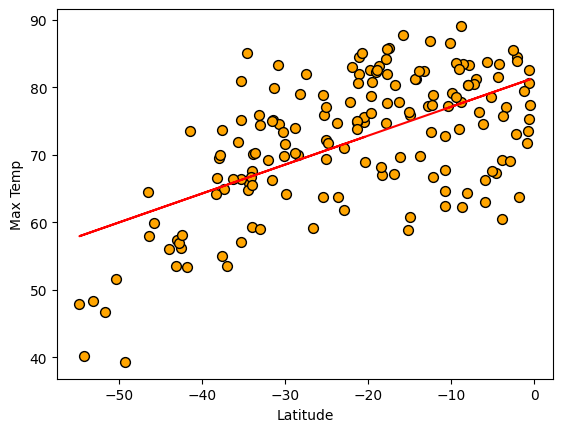

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10),"orange")

**Discussion about the linear relationship:** r-value .03 indicates a very weak correlation in the northern hemisphere at this time of the year. r-value .3 indicates a weak relationship in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.043248479061644494


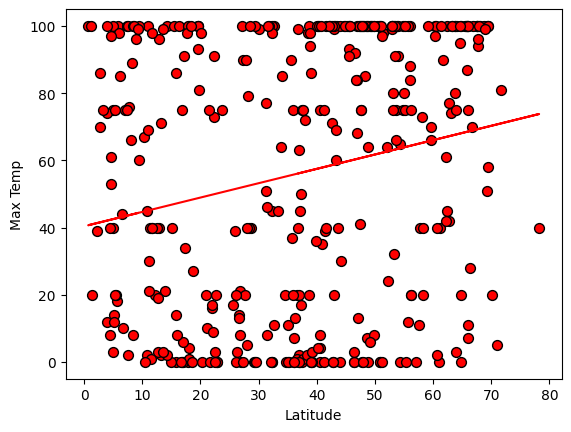

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10),"red")

The r-value is: 0.006996997447701094


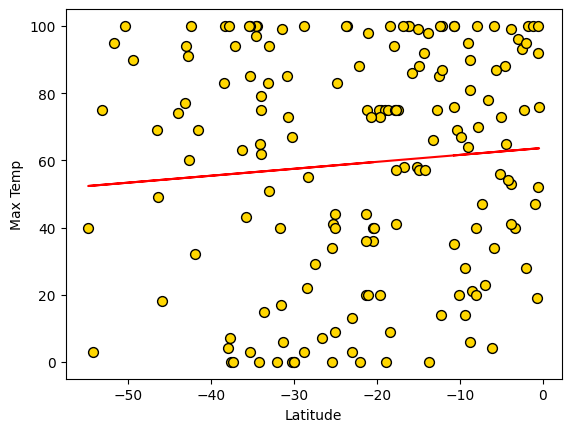

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10),"gold")

**Discussion about the linear relationship:** r-vales .04 in northern hemisphere and .006 in the southern hemisphere indicates little to no relationship at this time of the year

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03967195893171145


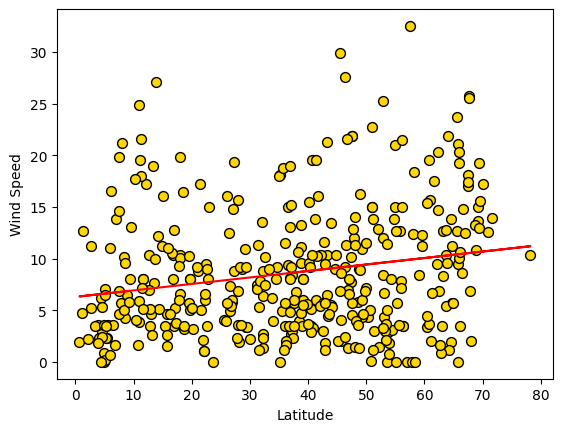

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10),"gold")

The r-value is: 0.038071055627571904


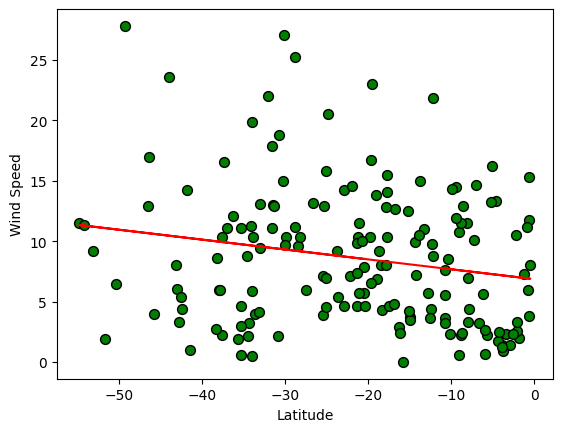

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10),"green")

**Discussion about the linear relationship:** both r-values are low indicating weak and little to no correlation around this time of year